<a href="https://colab.research.google.com/github/linux8bits/estudo_ocorrencias_aeronauticas_cenipa/blob/main/estudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estudo Ocorrências Aeronáuticas CENIPA**

## **Introdução**

Esse projeto visa explorar os dados sobre ocorrências Aeronáuticas na Aviação Civil Brasileira, nos últimos 10 anos, nesse estudo exploratório de dados busco responder: qual o fabricante apresenta mais ocorrência, qual tipo de aeronave possui mais problemas, qual tipo de operação que aprensenta mais risco e qual ocorrência ocorre com mais frequência.

Para esse estudo, foi aplicado 3 datasets da CENIPA:

- Tabela de aeronave [CSV](http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/aeronave.csv).
- Tabela de ocorrência [CSV](http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia.csv).
- Tabela do tipo de ocorrência [CSV](http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia_tipo.csv).

> Não se espante com a altura do voo. Quanto mais alto, mais longe do perigo. Quanto mais você se eleva, mais tempo há de reconhecer uma pane. É quando se está próximo do solo que se deve desconfiar. (Santos Dumont)

---

### **Tipos de gráficos plotados**


* Gráfico sobre ocorrência por fabricante
* Gráfico sobre ocorrência por tipo da aeronave
* Gráfico sobre ocorrência por tipo de motor da aeronave
* Gráfico sobre ocorrência por quantidade de motor da aeronave
* Gráfico sobre ocorrência por tipo segmento aéreo
* Gráfico sobre ocorrência por fase de operação
* Gráfico sobre ocorrência por classificação de ano
* Gráfico sobre ocorrência por tipo de classificação
* Gráfico estatístico sobre total de recomendações
* Gráfico sobre regressão linear (assentos/fatalidades)
* Mapa coroplético sobre ocorrência por densidade geográfica

## **Importar bibliotecas**



In [ ]:
%matplotlib inline
from sklearn.model_selection import train_test_split # Análise preditiva de dados
from sklearn.linear_model import LinearRegression # Análise preditiva de dados
from sklearn.datasets import make_regression # Análise preditiva de dados
from folium import plugins # Visualizando geoespacial

import matplotlib.pyplot as plt #Plotagem gráfica
import pandas as pd # DataFrames
import random # Gerar números pseudo-aleatórios
import folium # Visualizando geoespacial


## **Leitura dos datasets**

In [ ]:
aeronave = pd.read_csv('https://raw.githubusercontent.com/linux8bits/analise_dados_cenipa/main/dataset/aeronave.csv')
ocorrencia = pd.read_csv('https://raw.githubusercontent.com/linux8bits/analise_dados_cenipa/main/dataset/ocorrencia.csv') 
ocorrencia_tipo = pd.read_csv('https://raw.githubusercontent.com/linux8bits/analise_dados_cenipa/main/dataset/ocorrencia_tipo.csv') 


# **Análise de dados sobre aeronave**

### Amostra do dataframe

In [ ]:
aeronave.head()

,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,PISTÃO,MONOMOTOR,4.0,1979.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,BRIGADEIRO ARARIPE MACEDO,CORRENTINA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0
1,***,AVIÃO,BEECH AIRCRAFT,C90,TURBOÉLICE,BIMOTOR,8.0,1979.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,PRIVADA,NENHUM,0
2,***,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,TURBOÉLICE,BIMOTOR,73.0,2008.0,BRASIL,BRASIL,AVIÃO,REGULAR,AFONSO PENA,ADALBERTO MENDES DA SILVA,ARREMETIDA NO AR,REGULAR,LEVE,0
3,REGULAR,AVIÃO,BOEING COMPANY,757-225,JATO,BIMOTOR,5.0,1984.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0
4,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,JATO,BIMOTOR,184.0,2001.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0


### Exibir informações do dataframe

In [ ]:
aeronave.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6188 entries, 0 to 6187
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   aeronave_operador_categoria  6188 non-null   object 
 1   aeronave_tipo_veiculo        6188 non-null   object 
 2   aeronave_fabricante          6188 non-null   object 
 3   aeronave_modelo              6188 non-null   object 
 4   aeronave_motor_tipo          6185 non-null   object 
 5   aeronave_motor_quantidade    6188 non-null   object 
 6   aeronave_assentos            6010 non-null   float64
 7   aeronave_ano_fabricacao      6005 non-null   float64
 8   aeronave_pais_fabricante     6188 non-null   object 
 9   aeronave_pais_registro       6188 non-null   object 
 10  aeronave_registro_categoria  6188 non-null   object 
 11  aeronave_registro_segmento   6188 non-null   object 
 12  aeronave_voo_origem          6187 non-null   object 
 13  aeronave_voo_desti

### Remover colunas que não serão usadas

In [ ]:
aeronave.drop(['aeronave_operador_categoria', 'aeronave_nivel_dano'], axis = 1, inplace = True)

### Gráfico sobre ocorrência por fabricante

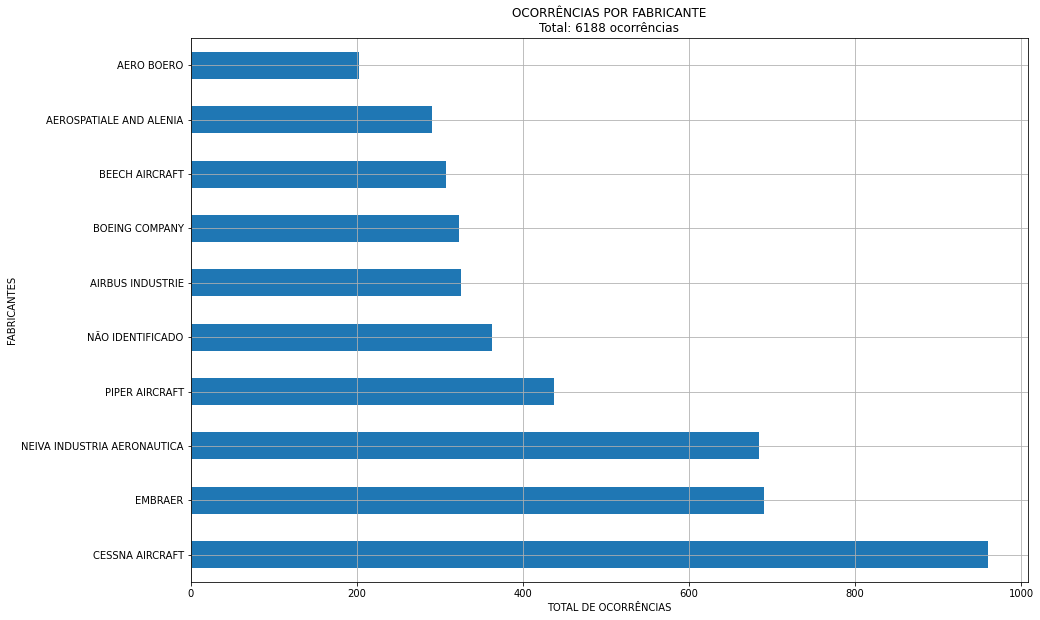

In [ ]:
aeronave['contagem'] = 1
aeronave = aeronave.apply(lambda x: x.replace('***','NÃO IDENTIFICADO'))
grouped = aeronave.groupby('aeronave_fabricante')['contagem'].sum().sort_values(ascending = False)
grouped.head(10).plot(kind='barh', figsize=(15,10), grid=True)

plt.title('OCORRÊNCIAS POR FABRICANTE\nTotal: ' + str(aeronave['contagem'].sum()) + ' ocorrências') 
plt.xlabel('TOTAL DE OCORRÊNCIAS') 
plt.ylabel('FABRICANTES') 
plt.show()

> Podemos observar no gráfico acima as ocorrências agrupadas por fabricante, sendo que o fabricante a **CESSNA** se destaque dos demais, pelo fato fabricar aviões pequenos de asa alta e motores a pistão voltados para o tranporte de carga entre outros.

### Gráfico sobre ocorrência por tipo da aeronave

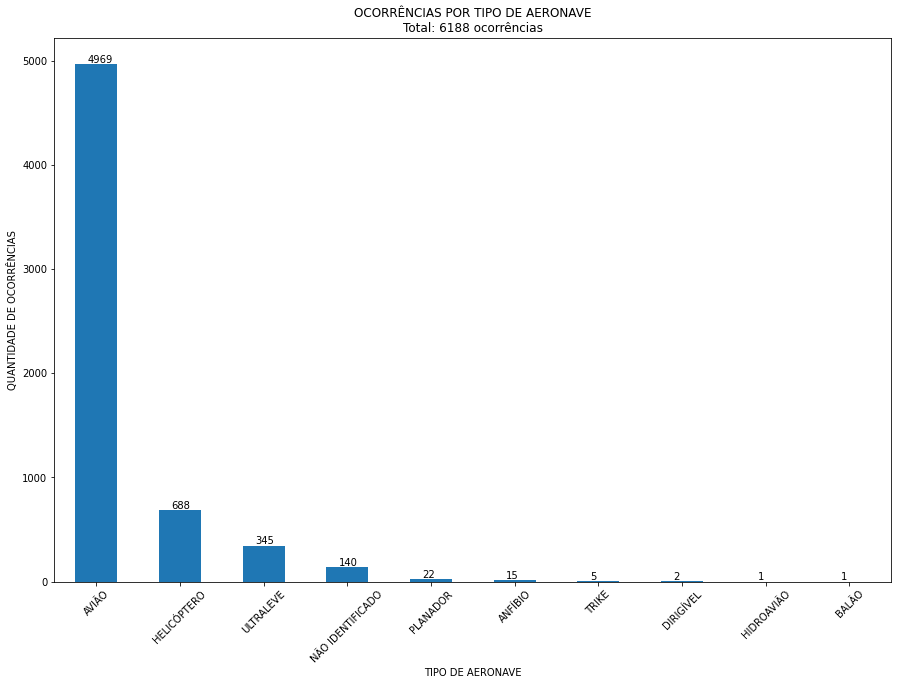

In [ ]:
aeronave = aeronave.apply(lambda x: x.replace('***','NÃO IDENTIFICADO'))
aeronave['contagem'] = 1

ax = aeronave.groupby('aeronave_tipo_veiculo')['contagem'].sum().sort_values(ascending = False).plot(kind='bar', figsize=(15,10))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 15))
    
plt.title('OCORRÊNCIAS POR TIPO DE AERONAVE\nTotal: ' + str(aeronave['contagem'].sum()) + ' ocorrências')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.xlabel('TIPO DE AERONAVE')
plt.xticks(rotation=45)
plt.show()

> Podemos observar no gráfico acima as ocorrências agrupadas por tipo de aeronave, no meio aeronáutico os **AVIÕES** são os modelos mais comuns de voos. 

### Gráfico sobre ocorrência por tipo de motor da aeronave

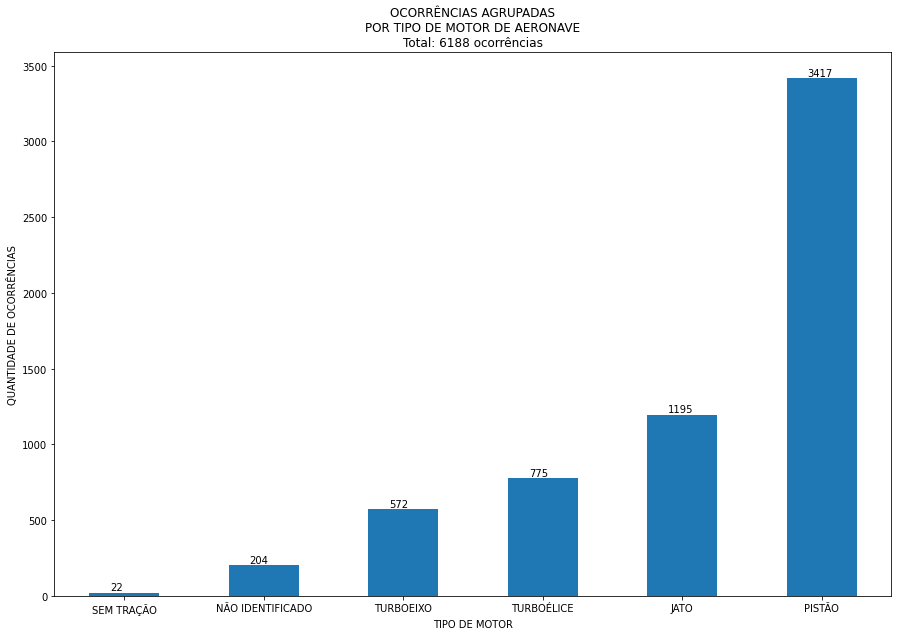

In [ ]:
aeronave = aeronave.apply(lambda x: x.replace('***','NÃO IDENTIFICADO'))
aeronave['contagem'] = 1

ax = aeronave.groupby('aeronave_motor_tipo')['contagem'].sum().sort_values().plot(kind='bar', figsize=(15,10))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 15))

plt.title('OCORRÊNCIAS AGRUPADAS\nPOR TIPO DE MOTOR DE AERONAVE\nTotal: '+str(aeronave['contagem'].sum())+' ocorrências')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.xlabel('TIPO DE MOTOR')
plt.xticks(rotation=0)
plt.show()

> Podemos observar no gráfico acima as ocorrências agrupadas por tipo de motores, sendo que o modelo a **PISTÃO** se destaque dos demais, esse motor é um dos mais antigos fabricados muito comum em aviões monomotores. Além do baixo custo, eles são semelhantes aos motores de carros, destinado para baixas altitudes.

### Gráfico sobre ocorrência por quantidade de motor da aeronave

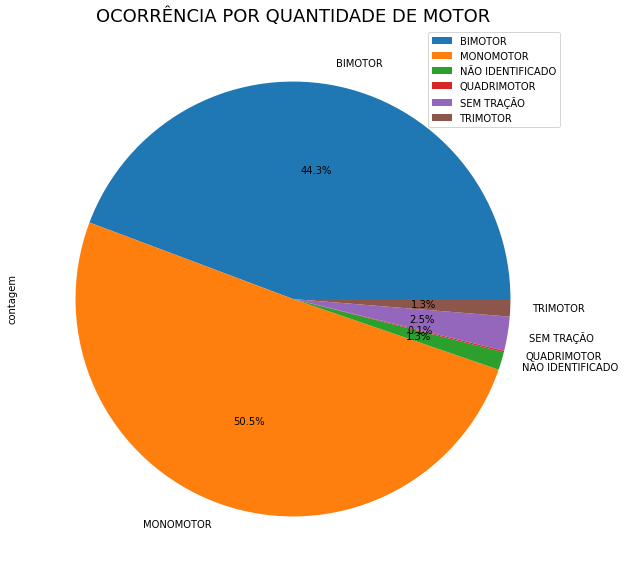

In [ ]:
aeronave.groupby(['aeronave_motor_quantidade']).sum().plot(kind='pie', y='contagem',figsize=(15,10), autopct='%1.1f%%')
plt.title('OCORRÊNCIA POR QUANTIDADE DE MOTOR',fontsize=18);

> Podemos observar no gráfico acima as ocorrências agrupadas por quantidade de motores sendo que os **MONOMOTOR** e **BIMOTOR** estão bem próximos, isso revela que a quantidade de motores não interfere na quantidade de ocorrência.

### Gráfico sobre ocorrência por tipo segmento aéreo

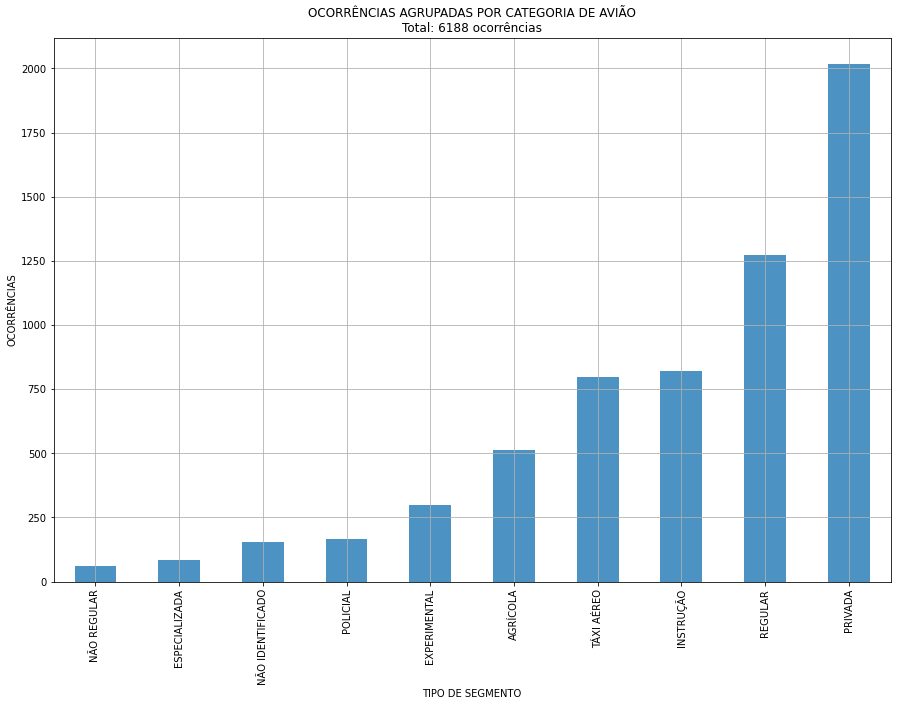

In [ ]:
aeronave.groupby('aeronave_tipo_operacao')['contagem'].sum().sort_values().plot(kind='bar', figsize=(15,10), alpha=.8, grid = True)

plt.title('OCORRÊNCIAS AGRUPADAS POR CATEGORIA DE AVIÃO\nTotal: '+str(aeronave['contagem'].sum())+' ocorrências')
plt.ylabel('OCORRÊNCIAS')
plt.xlabel('TIPO DE SEGMENTO')
plt.show()

> Podemos observar no gráfico acima as ocorrências por categoria de operação, sendo a **PRIVADA/PARTICULAR** o maior valor seguido pela **REGULAR** que refere-se as companhias aéreas para o público em geral. 

### Gráfico sobre ocorrência por fase de operação

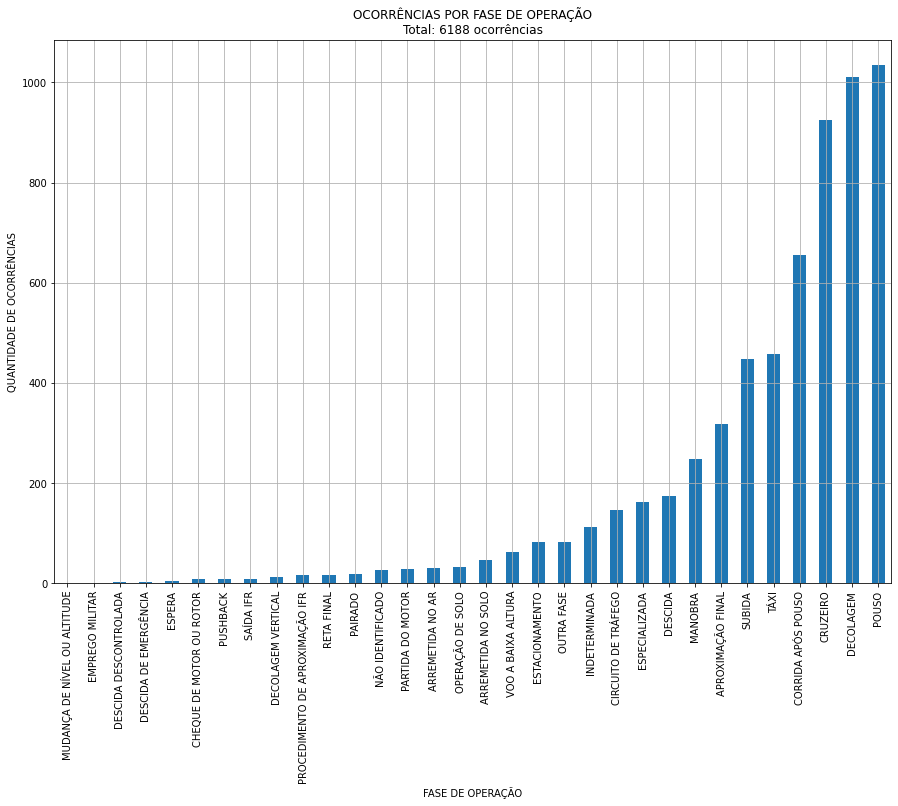

In [ ]:
aeronave.groupby('aeronave_fase_operacao')['contagem'].sum().sort_values().plot(kind='bar', figsize=(15,10), grid = True)
plt.title('OCORRÊNCIAS POR FASE DE OPERAÇÃO\nTotal: ' + str(aeronave['contagem'].sum()) + ' ocorrências')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.xlabel('FASE DE OPERAÇÃO')
plt.show()

> Podemos observar no gráfico acima as ocorrência por fase operação somado as frequência das ocorrências, as fases mais criticas para o pilotos são **POUSO** e **DECOLAGEM** aonde podem existir situações adversas como clima, temperatura, visibilidade e tráfego intenso que interferem diretamente na operação, vale ressaltar que **CRUZEIRO** existem outros fatores que influenciam.

# **Análise de dados sobre ocorrências**

### Amostra dataframe ocorrência

In [ ]:
ocorrencia.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,Unnamed: 22
0,40211,40211,40211,40211,40211,INCIDENTE,***,***,RIO DE JANEIRO,RJ,BRASIL,****,2010-01-03,12:00:00,SIM,FINALIZADA,***,NÃO,NaN,0.0,1,NÃO,NaN
1,40349,40349,40349,40349,40349,INCIDENTE,NaN,NaN,BELÉM,PA,BRASIL,SBBE,2010-01-03,11:05:00,SIM,FINALIZADA,NaN,NÃO,NaN,0.0,1,NÃO,NaN
2,40351,40351,40351,40351,40351,INCIDENTE,NaN,NaN,RIO DE JANEIRO,RJ,BRASIL,SBRJ,2010-01-03,03:00:00,SIM,FINALIZADA,NaN,NÃO,NaN,0.0,1,NÃO,NaN
3,39527,39527,39527,39527,39527,ACIDENTE,-13.1066666667,-55.9930555556,LUCAS DO RIO VERDE,MT,BRASIL,****,2010-01-04,17:30:00,SIM,FINALIZADA,A-539/CENIPA/2018,SIM,2019-10-28,0.0,1,NÃO,NaN
4,40324,40324,40324,40324,40324,INCIDENTE,NaN,NaN,PELOTAS,RS,BRASIL,SBPK,2010-01-05,19:25:00,SIM,FINALIZADA,NaN,NÃO,NaN,0.0,1,NÃO,NaN


### Exibir informações do dataframe ocorrência

In [ ]:
ocorrencia.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6094 entries, 0 to 6093
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   codigo_ocorrencia               6094 non-null   int64  
 1   codigo_ocorrencia1              6094 non-null   int64  
 2   codigo_ocorrencia2              6094 non-null   int64  
 3   codigo_ocorrencia3              6094 non-null   int64  
 4   codigo_ocorrencia4              6094 non-null   int64  
 5   ocorrencia_classificacao        6094 non-null   object 
 6   ocorrencia_latitude             4532 non-null   object 
 7   ocorrencia_longitude            4531 non-null   object 
 8   ocorrencia_cidade               6094 non-null   object 
 9   ocorrencia_uf                   6094 non-null   object 
 10  ocorrencia_pais                 6094 non-null   object 
 11  ocorrencia_aerodromo            6094 non-null   object 
 12  ocorrencia_dia                  60

### Remover colunas que não serão usadas

In [ ]:
ocorrencia.drop(['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2', 'codigo_ocorrencia3', 'codigo_ocorrencia4'], axis = 1, inplace = True)

### Gráfico sobre ocorrência por classificação de ano

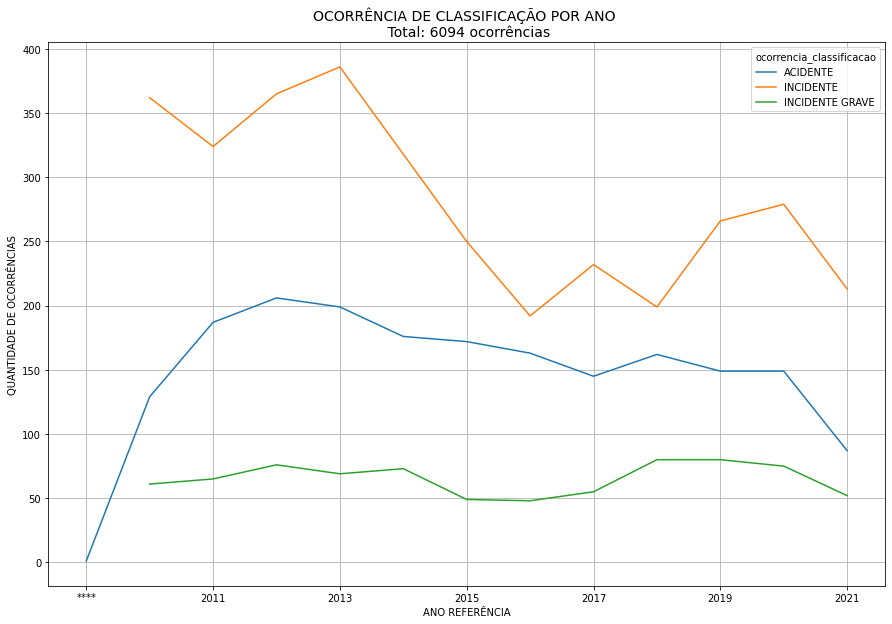

In [ ]:
ocorrencia['contagem'] = 1
ocorrencia.apply(lambda x: x.replace('***','NÃO IDENTIFICADO'))
ocorrencia['ocorrencia_dia'] = ocorrencia['ocorrencia_dia'].apply(lambda x: x.replace(x,x[0:4]))
ocorrencia.groupby(['ocorrencia_dia','ocorrencia_classificacao'])['contagem'].sum().unstack().plot(figsize=(15,10), grid=True)

plt.title('OCORRÊNCIA DE CLASSIFICAÇÃO POR ANO \n Total: ' + str(ocorrencia['contagem'].sum()) + ' ocorrências', fontsize=14)
plt.xlabel('ANO REFERÊNCIA')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.show()

> Podemos observar no gráfico acima as ocorrência por ano agrupadas por classificação: acidente, incidente e incidente grave, notamos que em 2010, 2012 e 2014 **acidente** teve o maior valor comparados com os demais e veio diminuir em 2020, também é notável a variação no **incidente** entre 2014 á 2020 e a constância do **incidente grave**.

### Gráfico sobre ocorrência por tipo de classificação

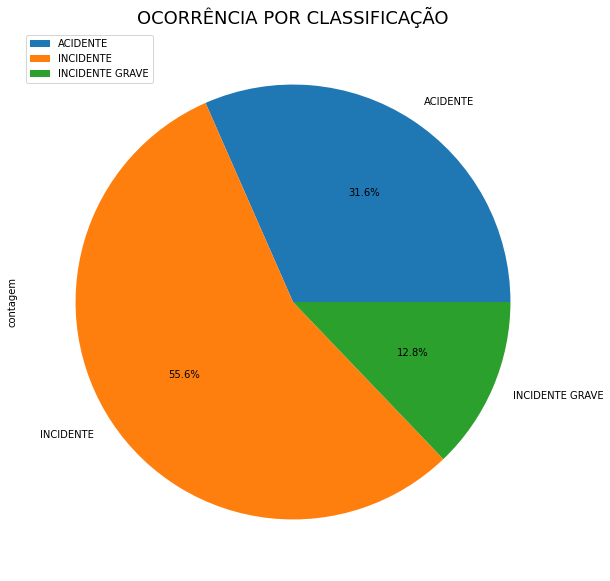

In [ ]:
ocorrencia.groupby(['ocorrencia_classificacao']).sum().plot(kind='pie', y='contagem',figsize=(15,10), autopct='%1.1f%%')
plt.title('OCORRÊNCIA POR CLASSIFICAÇÃO',fontsize=18);

> Podemos observar no gráfico acima as ocorrência divididas em três classificações, agrupadas por: acidente, incidente e incidente grave, sendo o **INCIDENTE** o maior valor significante.

### Gráfico sobre ocorrência por estado

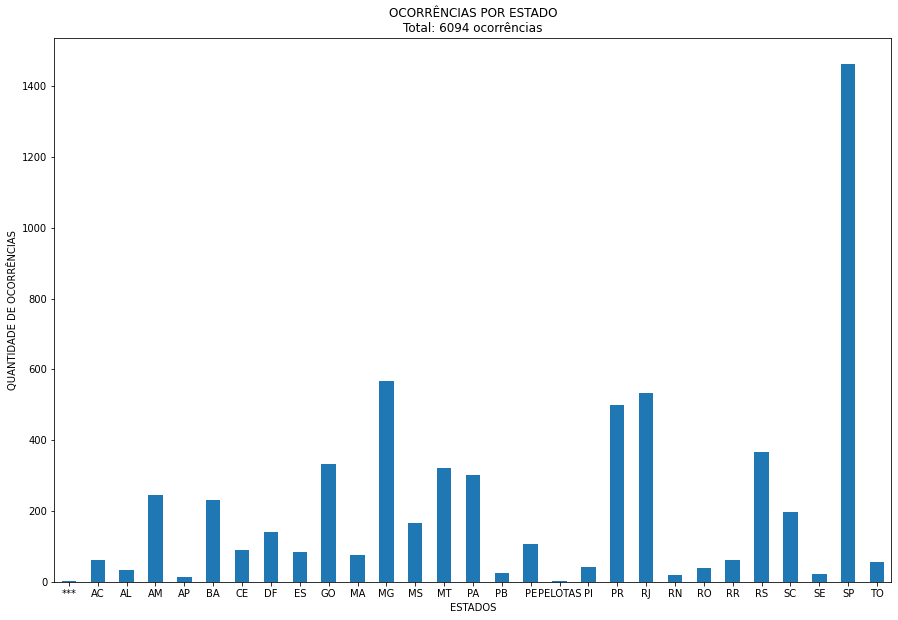

In [ ]:
ocorrencia.apply(lambda x: x.replace('***','NÃO IDENTIFICADO'))
ocorrencia.groupby('ocorrencia_uf')['contagem'].sum().plot(kind='bar', figsize=(15,10))

plt.title('OCORRÊNCIAS POR ESTADO\nTotal: ' + str(ocorrencia['contagem'].sum()) + ' ocorrências')
plt.xlabel('ESTADOS')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.xticks(rotation=0)
plt.show()

> Podemos observar no gráfico acima as ocorrências por estado sendo que São Paulo se destaque dos demais, atualmente o estado comporta os três maiores aeroportos do país, Congonhas (CGH), Viracopos (VCP) e sendo Guarulhos (GRU) tráfego internacional.



### Gráfico sobre ocorrência por tipo ranking de 30 registros

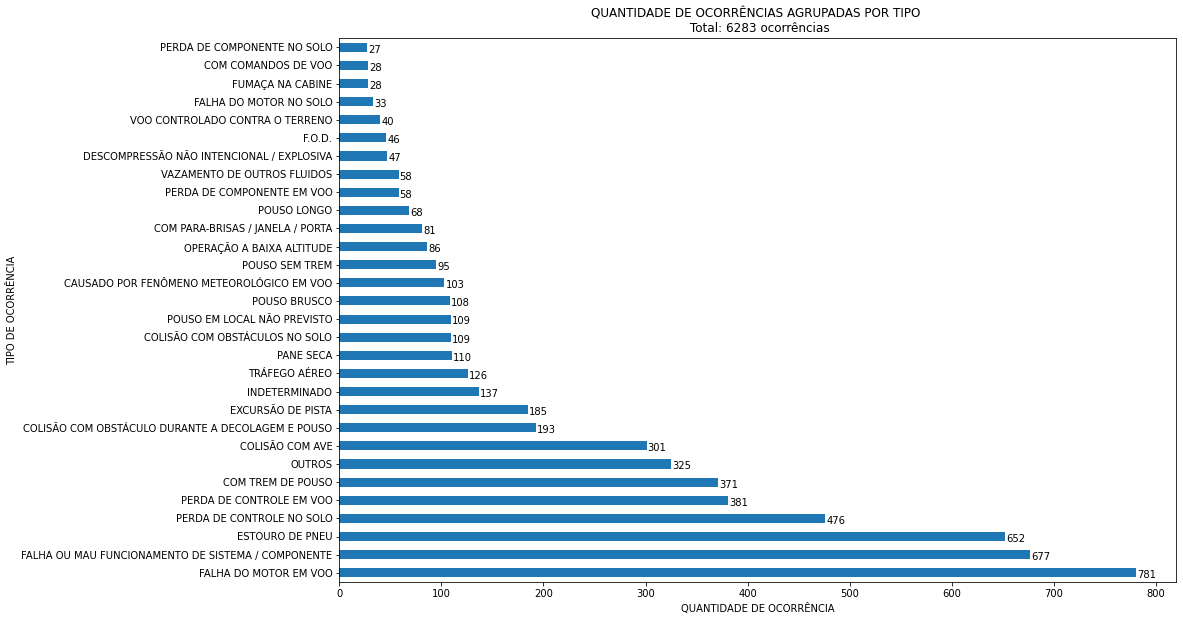

In [ ]:
ocorrencia_tipo['contagem'] = 1
ax = ocorrencia_tipo.groupby('ocorrencia_tipo')['contagem'].sum().sort_values(ascending = False).head(30).plot(kind='barh', figsize=(15,10)) 

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.title('QUANTIDADE DE OCORRÊNCIAS AGRUPADAS POR TIPO \n Total: ' + str(ocorrencia_tipo['contagem'].sum()) + ' ocorrências')
plt.ylabel('TIPO DE OCORRÊNCIA')
plt.xlabel('QUANTIDADE DE OCORRÊNCIA')
plt.show()

> Podemos observar no gráfico acima as ocorrência agrupadas por tipo de ocorrência somado a sua frequência, sendo nesse caso a **FALHA DO MOTOR EM VOO** o caso mais frequente, muito pelo fato motores mais antigos a pistão serem amplamente usados.

 ### Gráfico estatísticas sobre total de recomendações 

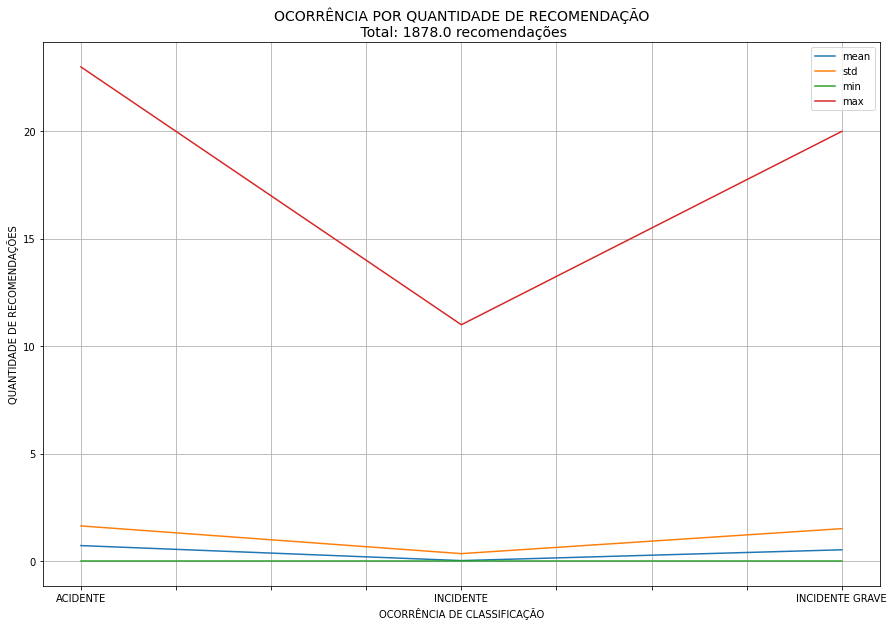

In [ ]:
ocorrencia['ocorrencia_dia'] = ocorrencia['ocorrencia_dia'].apply(lambda x: x.replace(x,x[0:4]))
ocorrencia.groupby('ocorrencia_classificacao')['total_recomendacoes'].describe()[['mean','std', 'min', 'max']].plot(figsize=(15,10), grid=True)

plt.title('OCORRÊNCIA POR QUANTIDADE DE RECOMENDAÇÃO\n Total: ' + str(ocorrencia['total_recomendacoes'].sum()) + ' recomendações', fontsize=14)
plt.xlabel('OCORRÊNCIA DE CLASSIFICAÇÃO')
plt.ylabel('QUANTIDADE DE RECOMENDAÇÕES')
plt.show()


> Podemos observar no gráfico acima as quantidades de recomendações agrupadas por acidente, incidente e incidente grave, estatisticamente os valores apresenta poucas recomendações realizadas.

### Gráfico sobre regressão linear (assentos/fatalidades)




In [ ]:
X_R1 = aeronave['aeronave_assentos']
y_R1 = aeronave['aeronave_fatalidades_total']

X_R1, y_R1 = make_regression(n_samples = 100, n_features=1, n_informative=1, bias = 150.0, noise = 30, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
random_state = 1)

linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
.format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
.format(linreg.score(X_test, y_test)))

linear model coeff (w): [44.31238628]
linear model intercept (b): 148.957
R-squared score (training): 0.649
R-squared score (test): 0.631


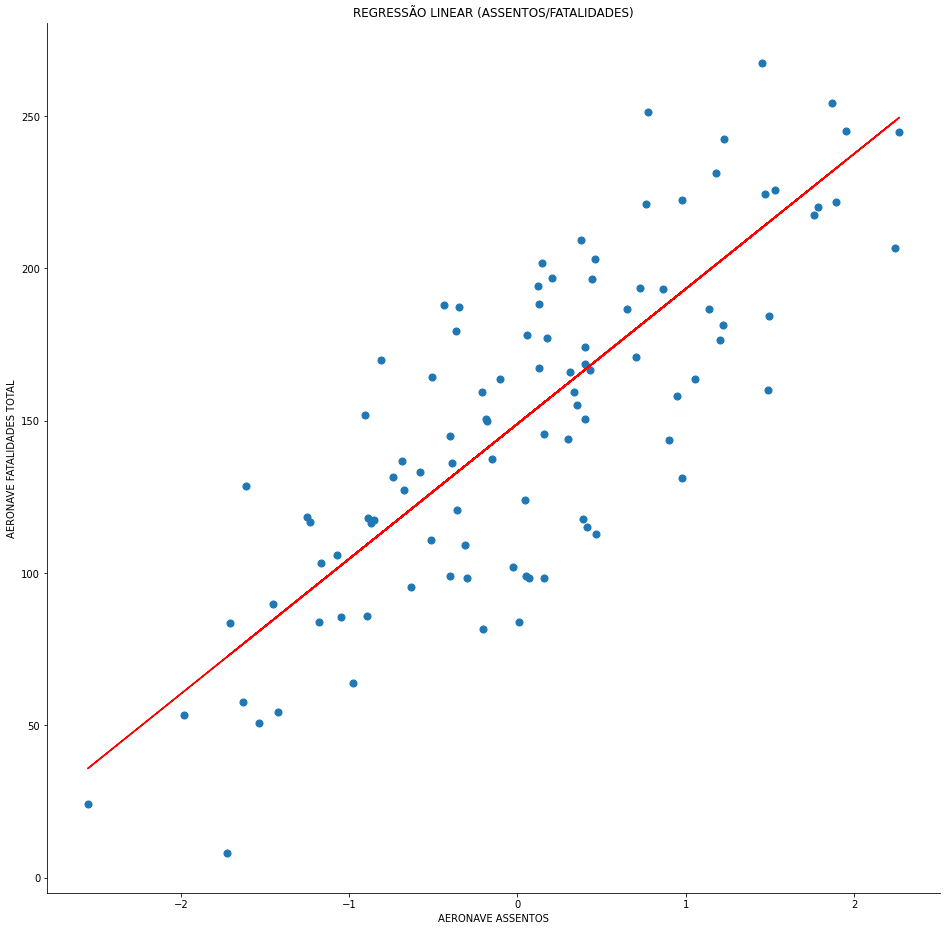

In [ ]:
plt.figure(figsize=(16,16))

plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')

plt.title('REGRESSÃO LINEAR (ASSENTOS/FATALIDADES)')
plt.xlabel('AERONAVE ASSENTOS')
plt.ylabel('AERONAVE FATALIDADES TOTAL')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

> Podemos observar no plano cartesiano a regressão linear de (assentos/fatalidades) essa correlação positiva reproduz a relação conforme uma variável aumenta, a outra variável também aumenta, ou seja, quanto maior assentos uma aeronve tiver maior são as chances de houver fatalidade em um acidente.

### Mapa coroplético sobre ocorrência por densidade geográfica

In [ ]:
coordenadas=[]

ocorrencia['ocorrencia_latitude'] = pd.to_numeric(ocorrencia['ocorrencia_latitude'],errors = 'coerce')
ocorrencia['ocorrencia_longitude'] = pd.to_numeric(ocorrencia['ocorrencia_longitude'],errors = 'coerce')

ocorrencia = ocorrencia.dropna(subset=['ocorrencia_latitude'])
ocorrencia = ocorrencia.dropna(subset=['ocorrencia_longitude'])

for lat,lng in zip(ocorrencia.ocorrencia_latitude.values,ocorrencia.ocorrencia_longitude.values):
  coordenadas.append([lat,lng])

mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=5,tiles='Stamen Terrain')
mapa.add_child(plugins.HeatMap(coordenadas))        


> Podemos observar no mapa espacial geográfico acima a densidade das ocorrências causadas por acidente e/ou incidente independente da gravidade, se houver, ou não fatalidade, nas áeras com maior concentração da tonalidade vermelha possuem normalmente um tráfego aéreo intenso e muitos deles são próximos de aeroportos. 


